#### First import some libraries

In [71]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import axes as ax
from matplotlib import cm, style
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sys
%matplotlib notebook

Now read the file coordAa.dat.txt into 6 arrays

In [72]:
style.use('seaborn-dark')
x, y, z, vx, vy, vz = np.loadtxt('coordAa.dat.txt', unpack=True)

Now plot x vs. y and mark each point with a blue dot 'b.':

<IPython.core.display.Javascript object>


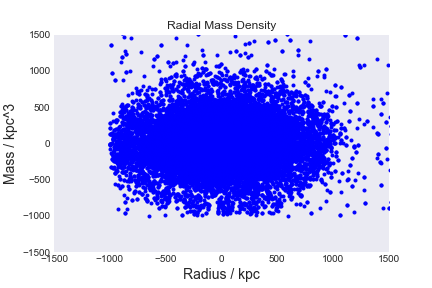

In [73]:
plt.plot(x, y, 'b.')
plt.show()

The points do not look centered around (0,0) so change the axes limits. Also let us add some axis labels:

In [74]:
plt.plot(x, y, 'b.')
plt.xlabel('x [kpc]', size=14)
plt.ylabel('y [kpc]', size=14)
plt.axis([-1500., 1500., -1500., 1500])
plt.show()

Now let's do the same thing with y vs. z:

In [75]:
plt.plot(y, z, 'b.')
plt.xlabel('y [kpc]', size=14)
plt.ylabel('z [kpc]', size=14)
plt.axis([-1500., 1500., -1500., 1500])
plt.show()

Now lets make a 3D scatter plot:

<IPython.core.display.Javascript object>


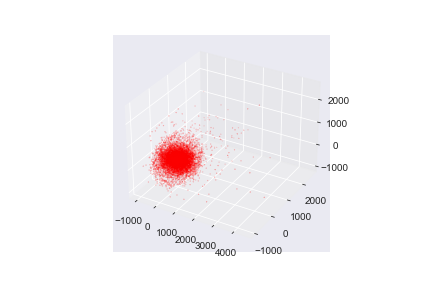

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='.', s=0.1)

Now let's center it and add labels on the axes to make it look pretty:

<IPython.core.display.Javascript object>


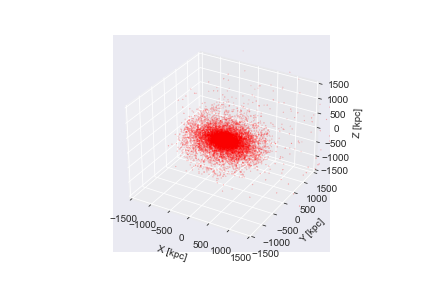

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='.', s=0.1)
#Axes3D.scatter(x,y,z)
ax.set_xlabel('X [kpc]')
ax.set_ylabel('Y [kpc]')
ax.set_zlabel('Z [kpc]')
#plt.axis([-1500., 1500., -1500., 1500, -1500, 1500])
ax.set_xlim3d(-1500, 1500)
ax.set_ylim3d(-1500, 1500)
ax.set_zlim3d(-1500, 1500)
plt.show()

In [78]:
unsorted_radius = [np.sqrt(i**2 + j**2 + k**2) for i, j, k in zip(x, y, z) if np.sqrt(i**2 + j**2 + k**2) <= 300]
radius = sorted(unsorted_radius)
max_radius = max(radius)
min_radius = min(radius)

print(max_radius, min_radius)

299.97082145558755 0.12655014816269478


Plot a histogram with 50 bins of radius vs frequency:

<IPython.core.display.Javascript object>


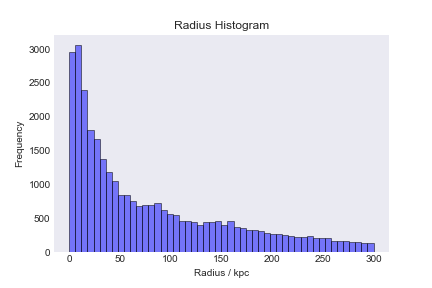

In [79]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

num_bins = 50
n, bins, patches = ax.hist(radius, num_bins, facecolor="blue", alpha=0.5, ec="black")

ax.set_title("Radius Histogram")
ax.set_xlabel("Radius / kpc")
ax.set_ylabel("Frequency")

plt.show()

Find median of each bin:

In [80]:
num_elements = 0
bin_content = []
median = []

for bin_size in n:
	bin_content = radius[int(num_elements) : int(num_elements + bin_size)]

	if bin_size == 0:
		median.append(0)

	elif bin_size % 2 == 1:
		median.append(float(bin_content[int(((bin_size + 1) / 2) - 1)]))

	else:
		median.append((bin_content[int((bin_size / 2) - 1)] + bin_content[int(bin_size / 2)]) / 2.0)
	
	num_elements += bin_size

print(median)

[3.538890732983995, 8.987642760700414, 14.8753154470754, 20.93865626562507, 26.915400289832, 33.04077525558382, 38.89839550084296, 45.040854441939715, 51.16583765384868, 57.30748831460734, 63.16339091704941, 68.93410720232819, 75.22137051543265, 81.35919400741929, 86.95260930762157, 93.05392080304217, 98.80811663729858, 105.13781305961993, 111.10047026997681, 116.78422423645242, 122.89403981031789, 128.8995851968888, 135.20060544024943, 141.1196327885316, 147.00651496627623, 153.06063017258498, 158.97217501396275, 164.9571306892188, 171.10046343653892, 177.0133021241931, 182.80180604718777, 188.64543447708985, 195.04740454825338, 200.93070255376603, 207.13016796184598, 212.8660075637019, 219.0970208594357, 225.058248432578, 230.47775463124418, 236.91737917877617, 242.86773976559755, 248.77721626825073, 254.71648959061739, 260.8407401034857, 266.63793432287537, 272.6426479349054, 279.1306367916204, 285.27400172841305, 291.36719409408465, 296.91740284457194]


Volume of each slice is the difference of the radius of 2 spheres:

In [81]:
volume_slices = (4.0 / 3.0) * np.pi * (bins[1] - bins[0]) ** 3
print(volume_slices)

903.3704154974153


Density = mass / volume:

In [82]:
mass = 1.0
radial_mass_density = [(float(i) * mass / volume_slices) for i in n]
print(radial_mass_density)

[3.2732973642620475, 3.3895287552825124, 2.6556105434104333, 2.0002868911807643, 1.8508465312973092, 1.5220777395537082, 1.3139682013456375, 1.1567790820608184, 0.9398138188226169, 0.9320650594212526, 0.8291172559459836, 0.7505226963035739, 0.7626993182200036, 0.7682341463638352, 0.79701525271176, 0.6885326210926593, 0.6298634427680436, 0.6066171645639507, 0.514739017376345, 0.508097223603747, 0.4837439797708876, 0.4461071483928323, 0.4903857735434856, 0.4925997048010183, 0.501455429831149, 0.4405723202490006, 0.508097223603747, 0.4128981795298423, 0.40072155761341266, 0.3630847262353573, 0.36087079497782465, 0.348694173061395, 0.3132712729408723, 0.2867040978504803, 0.30109465102444266, 0.28227623533541496, 0.255709060245023, 0.2468533352148923, 0.2534951289874903, 0.255709060245023, 0.22250009138203297, 0.229141885154631, 0.22139312575326664, 0.17711450060261333, 0.182649328746445, 0.18818415689027665, 0.16161698179988465, 0.16161698179988465, 0.15386822239852033, 0.13947766922455798

Plot a histogram of radius vs mass density:

<IPython.core.display.Javascript object>


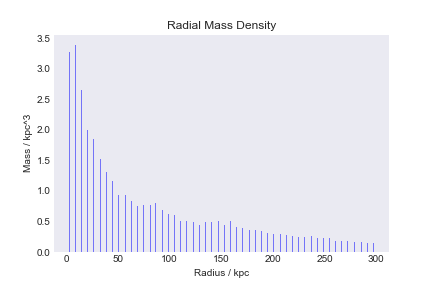

In [83]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.bar(median, radial_mass_density, facecolor="blue", alpha=0.5, width=1)

ax.set_title("Radial Mass Density")
ax.set_xlabel("Radius / kpc")
ax.set_ylabel("Mass / kpc^3")

plt.show()

A log 10 radius histogram plot:

<IPython.core.display.Javascript object>


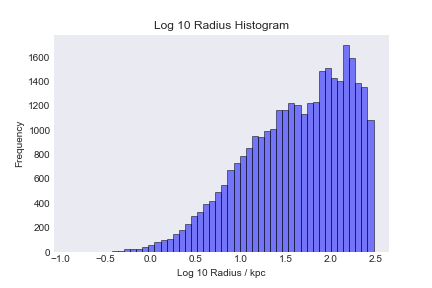

[-0.897737342041064, -0.7945182501104431, -0.7030429395063352, -0.686746977352643, -0.5841451106937777, -0.5194844984152494, -0.4654044412861438, -0.40241606194973567, -0.31574268662638805, -0.2635129752501123, -0.18348928121090202, -0.10982547926204381, -0.04618291425046696, 0.016827921984129458, 0.08804555370683803, 0.1446845091001933, 0.21741034119072752, 0.2818532686209949, 0.3532498773549223, 0.4221075582359831, 0.4899137497323748, 0.5545073940832683, 0.6221423807809292, 0.6902337033844838, 0.7536865335478522, 0.8252089459008015, 0.8903523856429416, 0.9616239295568019, 1.025712802646238, 1.0940739316867132, 1.1607062820869545, 1.2270507726187583, 1.2978016491953845, 1.3645795243202974, 1.4303940474857402, 1.499250384286661, 1.5655680855742447, 1.6337237868377743, 1.7013817629405403, 1.7687699907295928, 1.835659800879196, 1.9059169125155646, 1.9699220939946653, 2.037163717746437, 2.107172815458945, 2.173627461840942, 2.240360467827419, 2.3084335070727753, 2.375253674909231, 2.44151

<IPython.core.display.Javascript object>


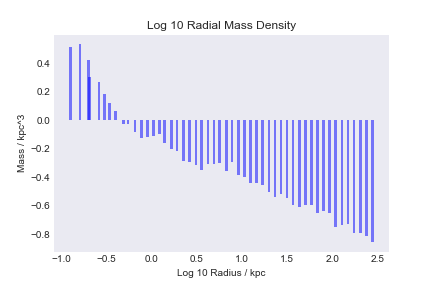

In [92]:
log10_radius = [np.log10(i) for i in radius]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

num_bins = 50
n, bins, patches = ax.hist(log10_radius, num_bins, facecolor="blue", alpha=0.5, ec="black")

ax.set_title("Log 10 Radius Histogram")
ax.set_xlabel("Log 10 Radius / kpc")
ax.set_ylabel("Frequency")

plt.show()

num_elements = 0
bin_content = []
log10_median = []

for bin_size in n:
	bin_content = log10_radius[int(num_elements) : int(num_elements + bin_size)]

	if bin_size == 0:
		log10_median.append(0)

	elif bin_size % 2 == 1:
		log10_median.append(float(bin_content[int(((bin_size + 1) / 2) - 1)]))

	else:
		log10_median.append((bin_content[int((bin_size / 2) - 1)] + bin_content[int(bin_size / 2)]) / 2.0)
	
	num_elements += bin_size

print(log10_median)

log10_radial_mass_density = np.log10(radial_mass_density)
print(log10_radial_mass_density)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.bar(log10_median, log10_radial_mass_density, facecolor="blue", alpha=0.5, width=0.03)

ax.set_title("Log 10 Radial Mass Density")
ax.set_xlabel("Log 10 Radius / kpc")
ax.set_ylabel("Mass / kpc^3")

plt.show()

A radial mass density 2d plot:

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<IPython.core.display.Javascript object>


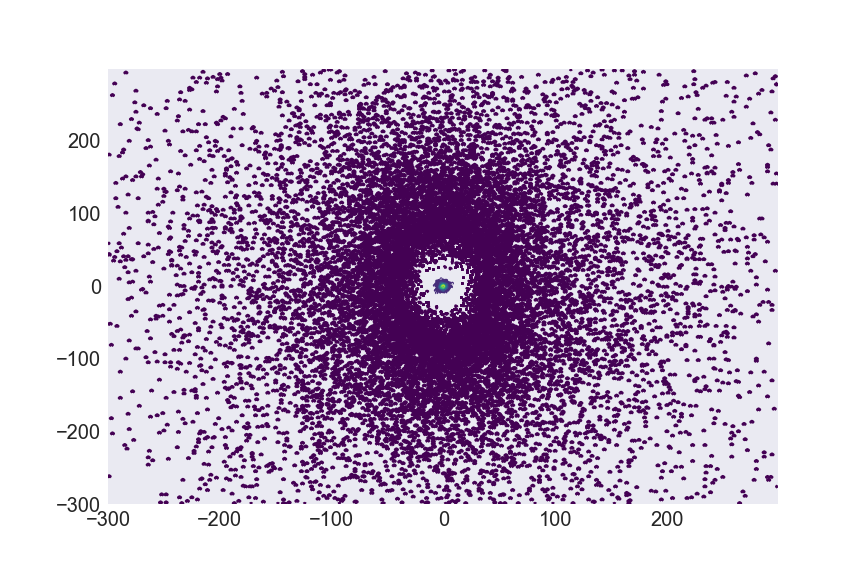

<IPython.core.display.Javascript object>


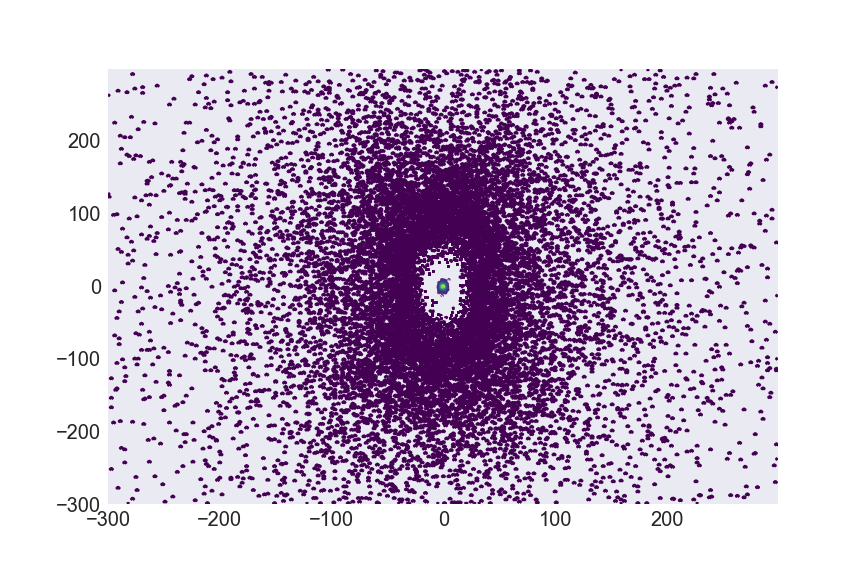

<IPython.core.display.Javascript object>


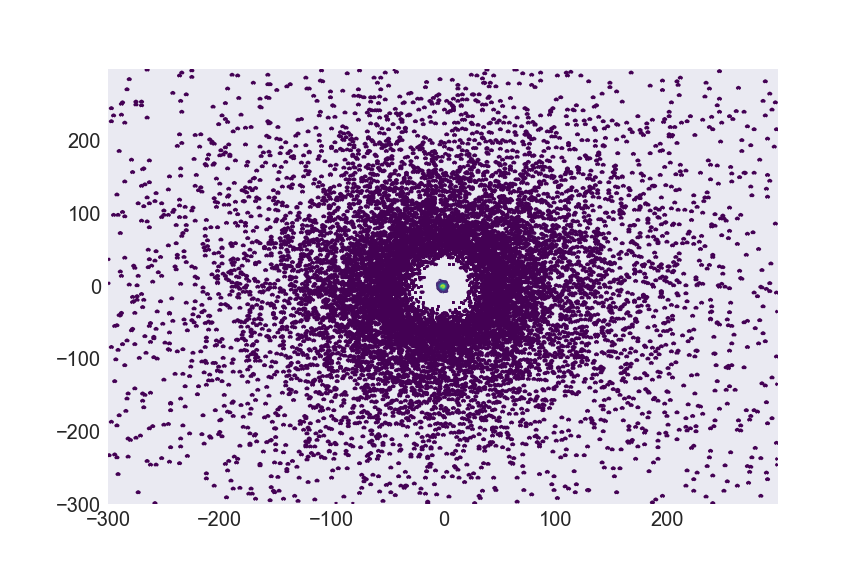

In [122]:
star_coords = list(filter(lambda x: ((-300 <= x[0] <= 300) and (-300 <= x[1] <= 300) and (-300 <= x[2] <= 300)), zip(x, y, z)))
# print(star_coords)

surface_density_xy = np.zeros((600, 600))
surface_density_xz = np.zeros((600, 600))
surface_density_yz = np.zeros((600, 600))

for i in star_coords:
    surface_density_xy[int(np.floor(i[0] + 300))][int(np.floor(i[1] + 300))] += 1
    surface_density_xz[int(np.floor(i[0] + 300))][int(np.floor(i[2] + 300))] += 1
    surface_density_yz[int(np.floor(i[1] + 300))][int(np.floor(i[2] + 300))] += 1
    
print(surface_density_xy)
print(surface_density_xz)
print(surface_density_yz)

grid_x = range(-300, 300)
grid_y = range(-300, 300)
X, Y = np.meshgrid(grid_x, grid_y)

Z1 = surface_density_xy
Z2 = surface_density_xz
Z3 = surface_density_yz

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X, Y, Z1, cmap=cm.viridis)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X, Y, Z2, cmap=cm.viridis)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X, Y, Z3, cmap=cm.viridis)
plt.show()

3D velocity and its relationship to radius:

[372.03709029 324.16773951 402.53865348 ... 309.49799847 455.02400573
  63.28958936] 31773


<IPython.core.display.Javascript object>


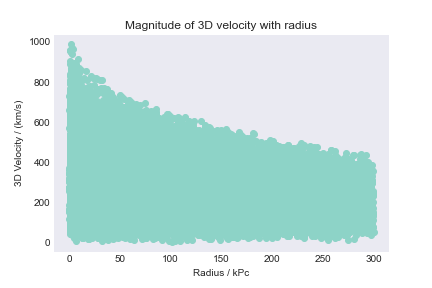

In [95]:
v_3d = np.array([np.sqrt(vx[i] ** 2 + vy[i] ** 2 + vz[i] ** 2) for i in range(39656) if np.sqrt(x[i]**2 + y[i]**2 + z[i]**2) <= 300])
print(v_3d, len(v_3d))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(unsorted_radius, v_3d)
ax.set_title("Magnitude of 3D velocity with radius")
ax.set_xlabel("Radius / kPc")
ax.set_ylabel("3D Velocity / (km/s)")

plt.show()

<IPython.core.display.Javascript object>


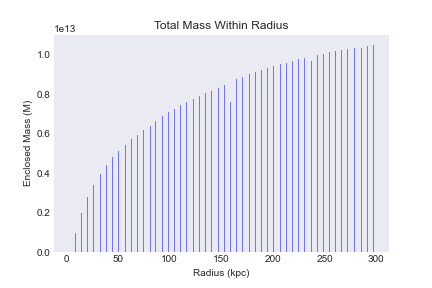

<IPython.core.display.Javascript object>


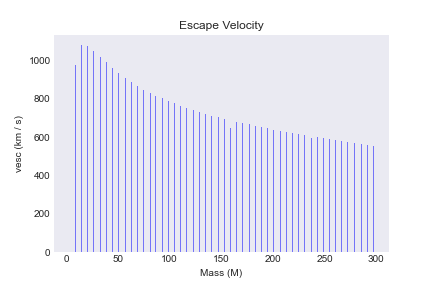

Approximate mass per particle: 300000000000
Total mass of galaxy: 10509642376070.453


In [117]:
stellar_mass = 3 * (10 ** 11)
G = 4.35 * 10 ** (-6)

enclosed_mass = [stellar_mass * sum(radial_mass_density[:radial_mass_density.index(i)]) for i in radial_mass_density]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(median, enclosed_mass, facecolor="blue", alpha=0.5, width=1)

ax.set_title("Total Mass Within Radius")
ax.set_xlabel("Radius (kpc)")
ax.set_ylabel("Enclosed Mass (M)")

plt.show()

escape_velocity = [np.sqrt(2 * G * value / median[index]) for index, value in enumerate(enclosed_mass)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(median, escape_velocity, facecolor="blue", alpha=0.5, width=1)

ax.set_title("Escape Velocity")
ax.set_xlabel("Mass (M)")
ax.set_ylabel("vesc (km / s)")

plt.show()

print("Approximate mass per particle:", stellar_mass)
print("Total mass of galaxy:", enclosed_mass[-1])
